In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('/Users/prerakpandya/Desktop/train_data.csv')
df2= pd.read_csv('/Users/prerakpandya/Downloads/test_data.csv')

In [103]:
df.shape

(29165, 20)

In [104]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


[Is high risk] = 

         0 means applicant eligible for creditcard NO RISK
                 
         1 Means applicant nnr able to repay money HIGH RISK

In [105]:
#As we see, Age, Employment length, and Account age have negative data, so we will drop those columns.
df.drop([ 'Age', 'Employment length', 'Account age'],axis=1,inplace=True)

In [106]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,2.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,2.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,1.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,1,0,NaN,1.0,0


In [107]:
df.dtypes

ID                       int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count    float64
Is high risk             int64
dtype: object

In [108]:
#Family member count tyoe change to int type
df['Family member count'] = df['Family member count'].astype(int)

In [109]:
df.dtypes

ID                       int64
Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count      int64
Is high risk             int64
dtype: object

In [110]:
#let's check null value
df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Is high risk              0
dtype: int64

Here, we have some null values in our data.

To deal with these null values, we have multiple options available.

The first option is to drop the null values altogether. 

The second option is to replace the null values with the median value or integer value (if the data type is int).

These two options are the most commonly used methods for dealing with null values.

Another option is to use forward or backward fill, which is mostly used in forecasting data.

Additionally, we can use interpolation to estimate the value based on other data.

In [111]:
#In our case we drop the null values
df = df.dropna()

In [112]:
df.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Is high risk           0
dtype: int64

In [113]:
df.shape

(20138, 17)

In [114]:
df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,2,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,2,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,1,0
5,5100411,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Accountants,2,0


In [115]:
#we dont neer ID columns to future visulaization and predict the model
df.drop('ID',axis=True,inplace=True)

In [116]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,2,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,2,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,1,0
5,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Accountants,2,0


Finally, we can see the clear data. If there is any pending cleaning required, we clean it. This helps in improving the accuracy of the predictive model.

# 

# Visulaization

#### 

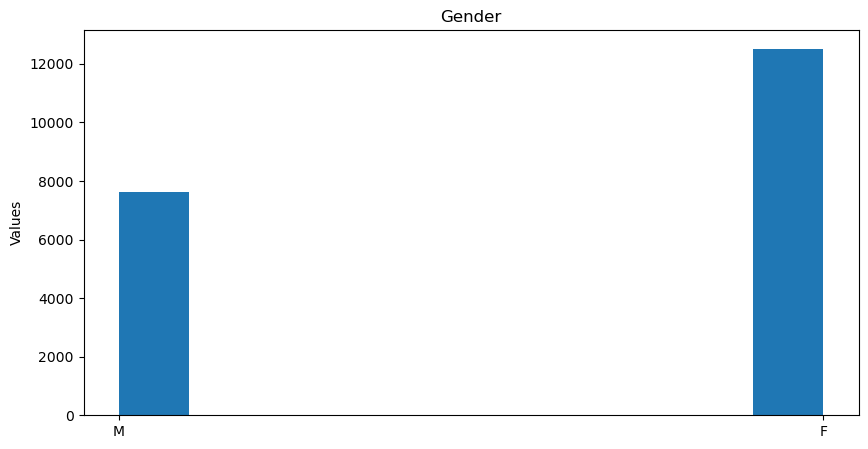

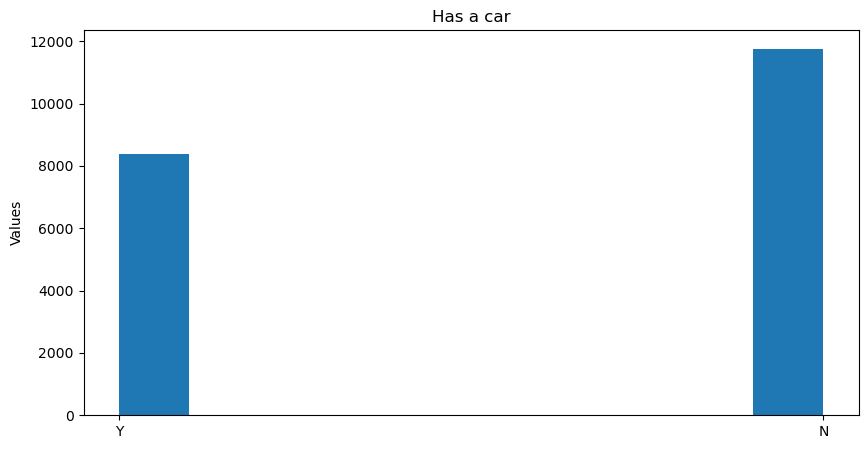

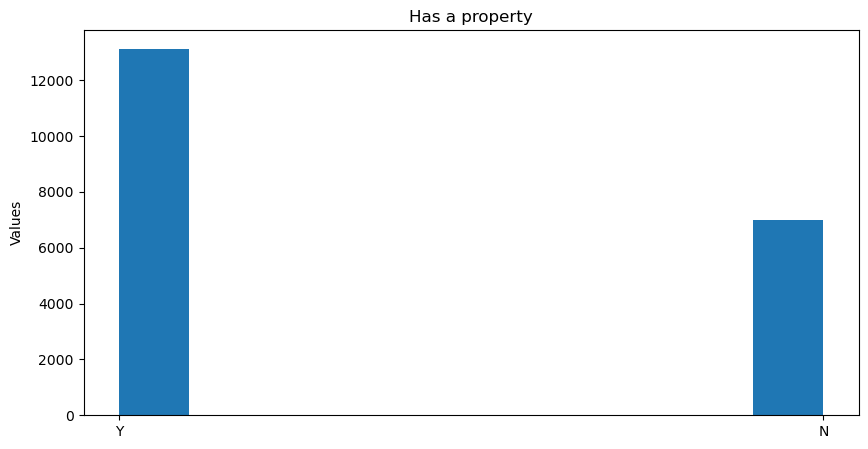

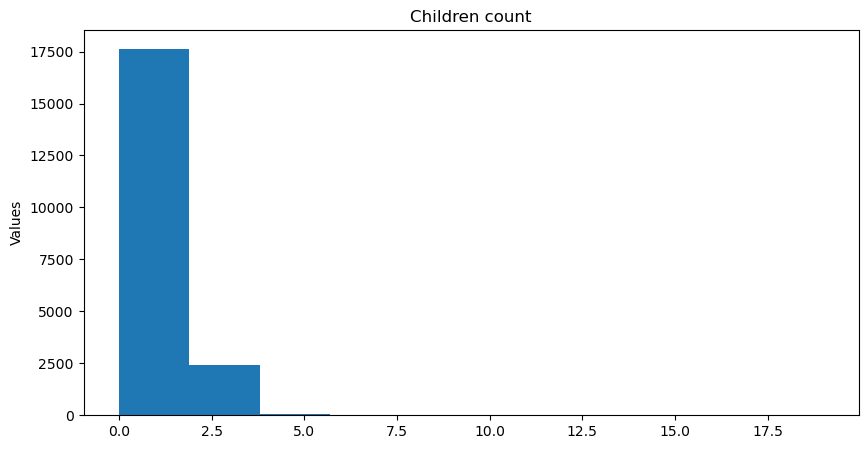

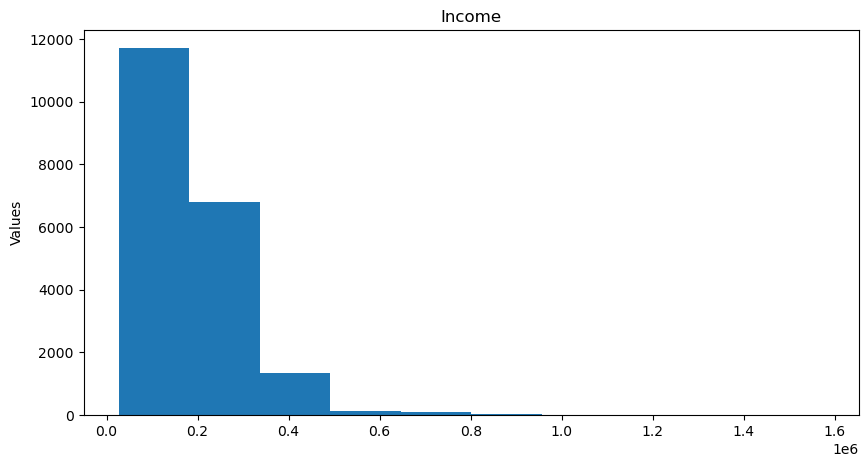

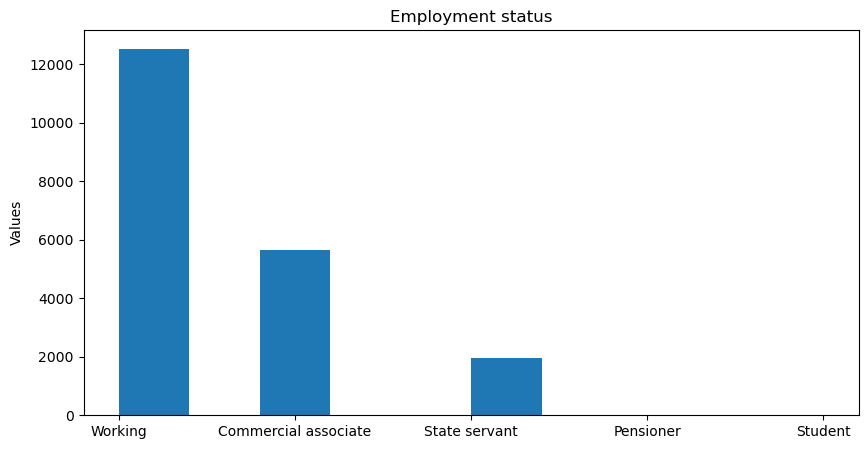

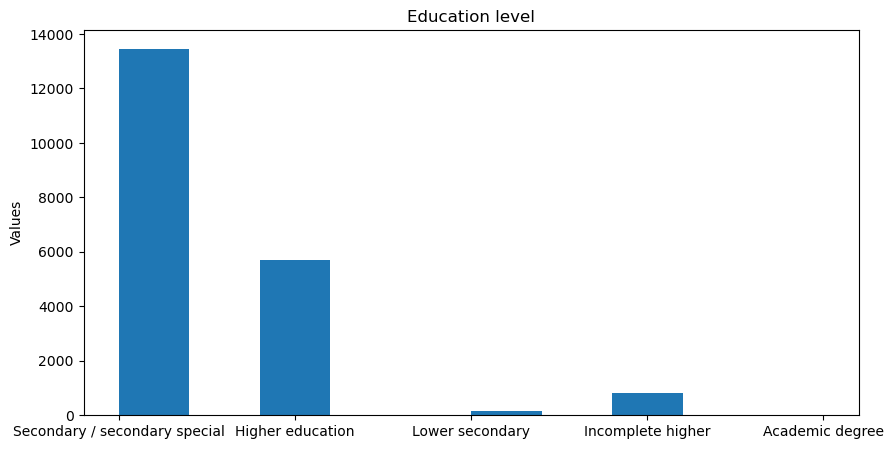

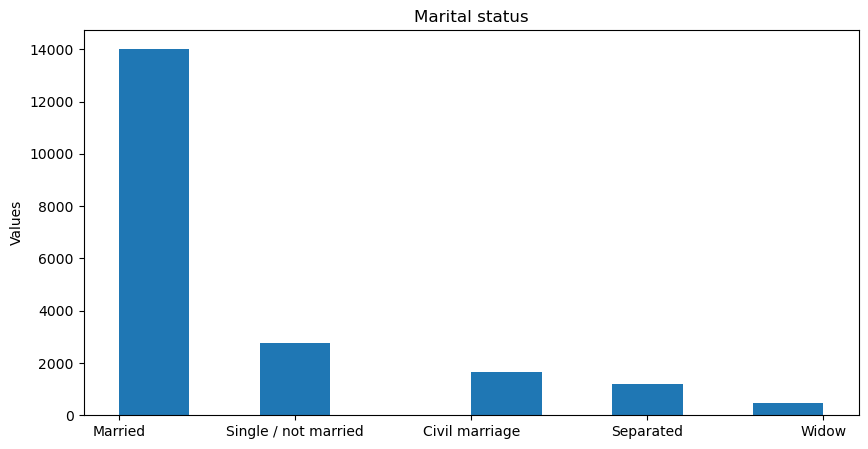

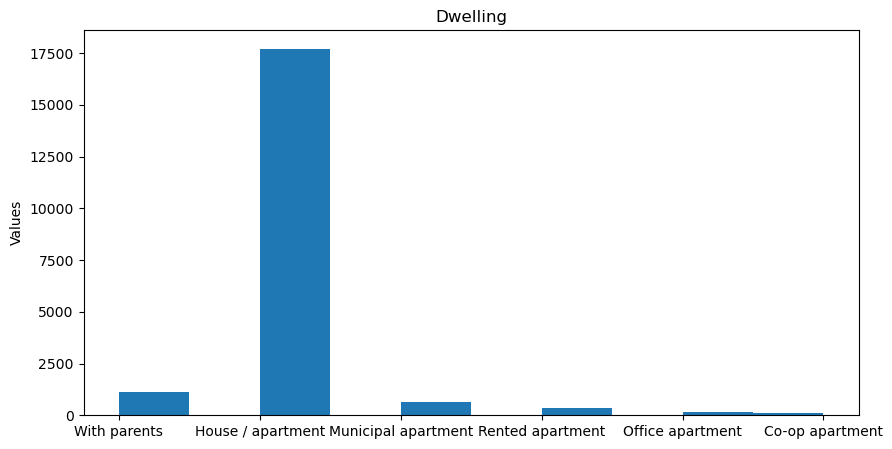

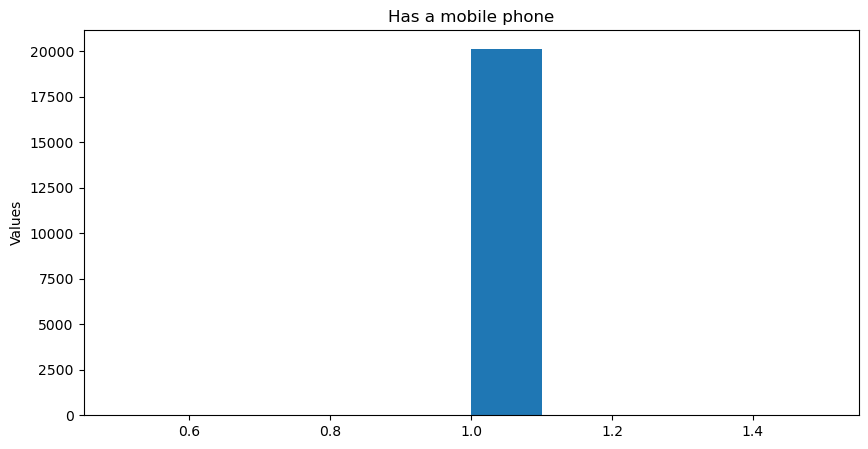

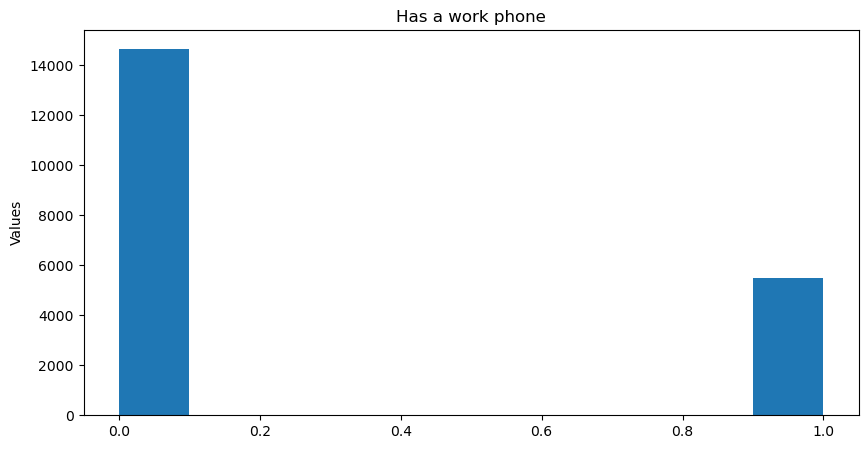

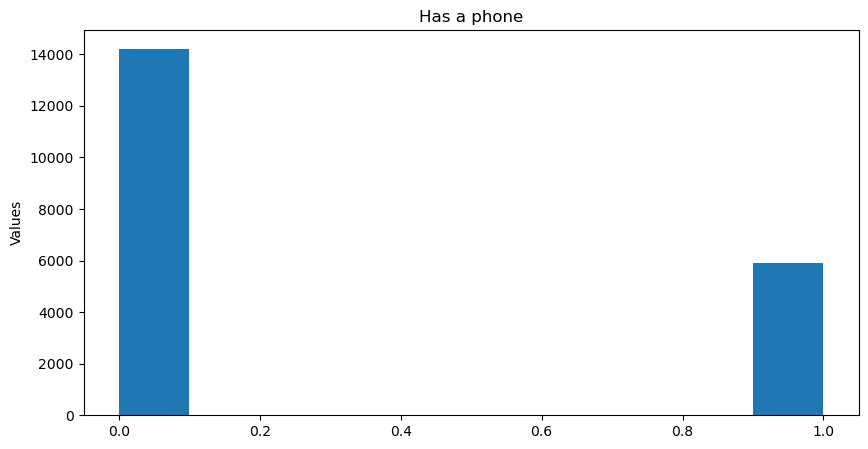

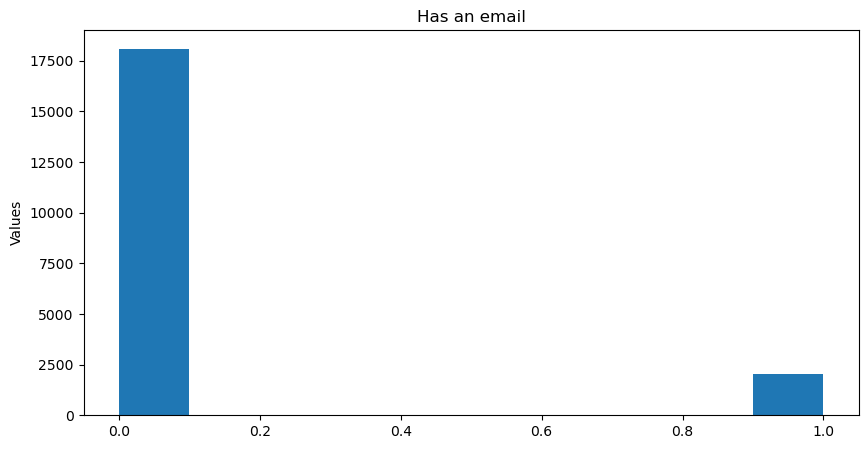

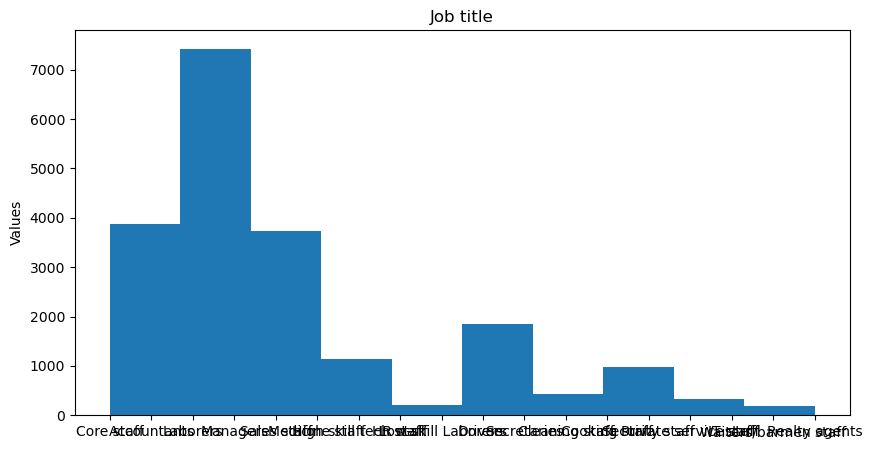

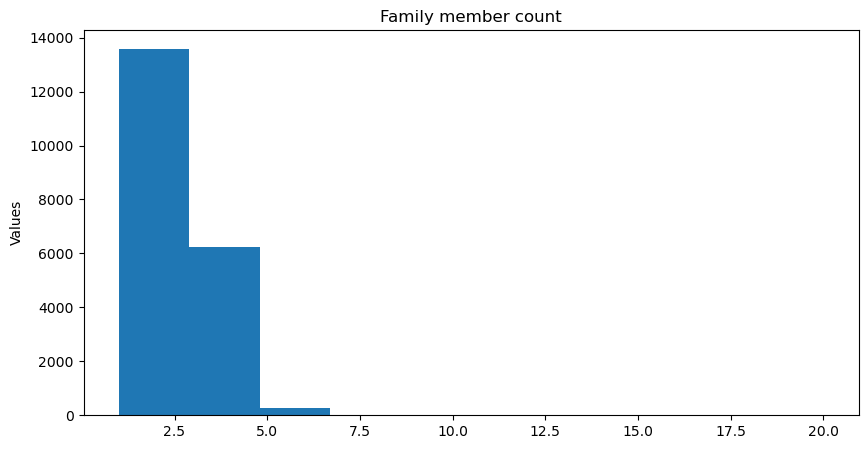

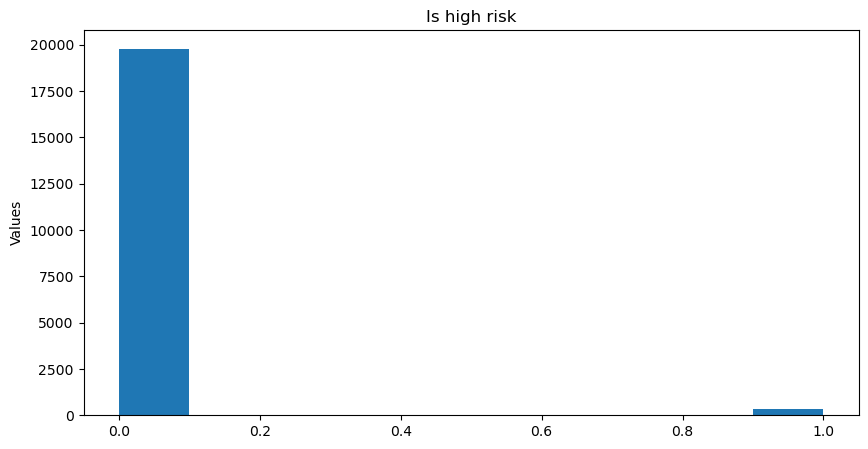

In [117]:
#Already import lib 
#first visulaization all column together
for i in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[i])
    plt.title(f'{i}')
    plt.ylabel('Values')
    plt.show()

In [118]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,2,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,2,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,1,0
5,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Accountants,2,0


# 

In [119]:
#Here, we can see a some important visualization of columns.
income = df.groupby('Employment status')['Income'].sum()
income = pd.DataFrame(income)

In [120]:
income
income['employee'] = income.index
income = income.reset_index()
income.drop('Employment status',axis=1,inplace=True)

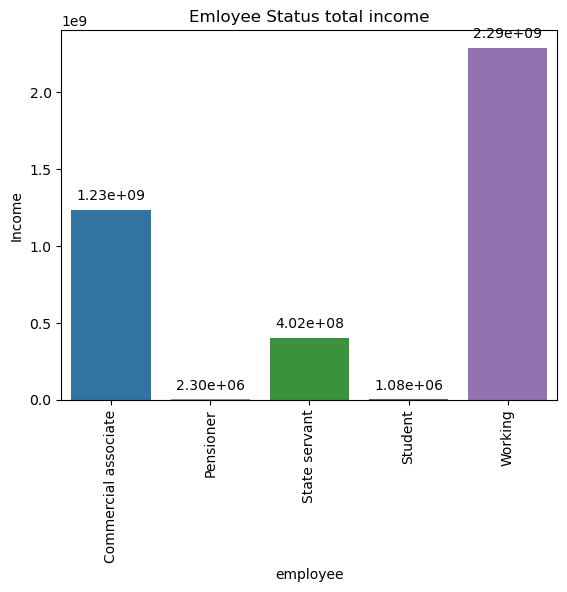

In [121]:
sns.barplot(data = income,x = 'employee',y = 'Income' )
plt.xticks(rotation = 90)
plt.title('Emloyee Status total income')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Most employee income comes from commercial associates, followed by state servants.

# 

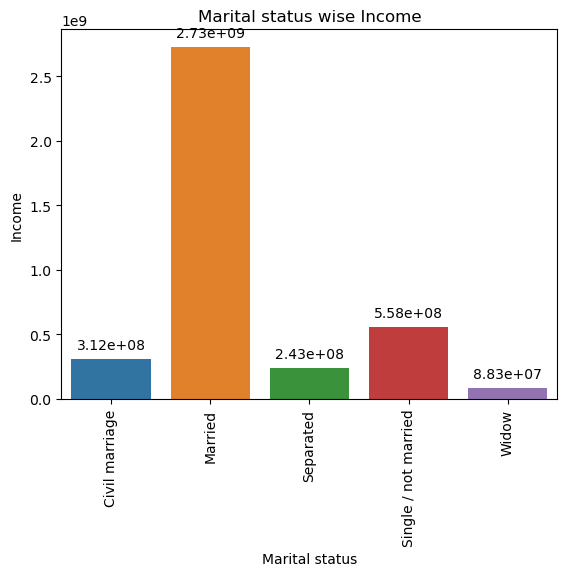

In [122]:
ms = df.groupby('Marital status')['Income'].sum()
ms = pd.DataFrame(ms)
ms['Marital status'] = ms.index 
ms.reset_index(drop=True,inplace= True)
sns.barplot(data = ms,x = 'Marital status',y = 'Income')
plt.xticks(rotation = 90)
plt.title('Marital status wise Income')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


Married couples have the highest income, followed by singles, those in civil marriages, separated individuals, and widows.

# 

In [123]:
f = df.groupby(['Education level','Gender'])['Income'].sum()

In [124]:
f = pd.DataFrame(f)
f.reset_index(inplace=True)

In [125]:
f

,Education level,Gender,Income
0,Academic degree,F,2.160000e+06
1,Academic degree,M,3.150000e+05
2,Higher education,F,7.877709e+08
3,Higher education,M,5.223018e+08
4,Incomplete higher,F,8.986185e+07
5,Incomplete higher,M,7.224300e+07
6,Lower secondary,F,1.081800e+07
7,Lower secondary,M,1.436670e+07
8,Secondary / secondary special,F,1.357166e+09
9,Secondary / secondary special,M,1.071024e+09


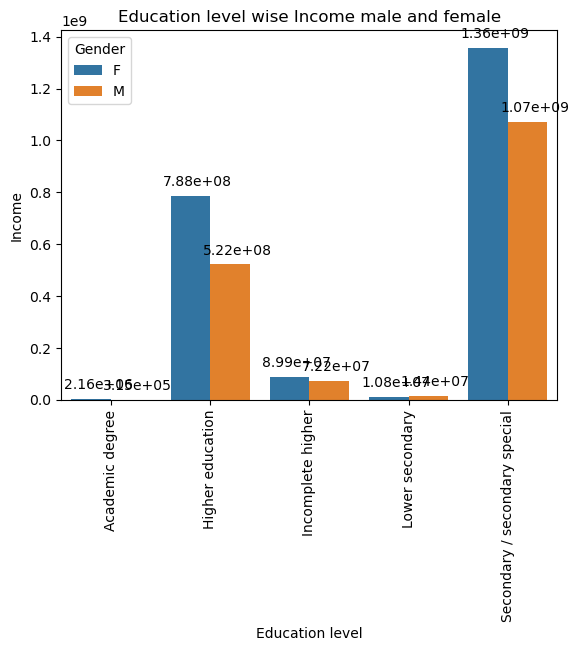

In [126]:
sns.barplot(data = f,x= 'Education level',y = 'Income',hue = 'Gender')
plt.xticks(rotation = 90)
plt.title('Education level wise Income male and female')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(5, 10), textcoords='offset points')


It appears that in secondary education, there is more funding and a higher percentage of females than males.

This trend continues into higher education, where females also dominate

Women tend to have more prominent facial features than men

# 

In [127]:
df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Core staff,2,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Accountants,2,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,4,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,Managers,1,0
5,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Accountants,2,0


In [128]:
j = df.groupby(['Job title','Gender'])['Income'].sum()
j = pd.DataFrame(j)
j.reset_index(inplace=True)


In [129]:
j.reset_index(inplace=True)


In [130]:
j.drop('index',axis=1,inplace=True)

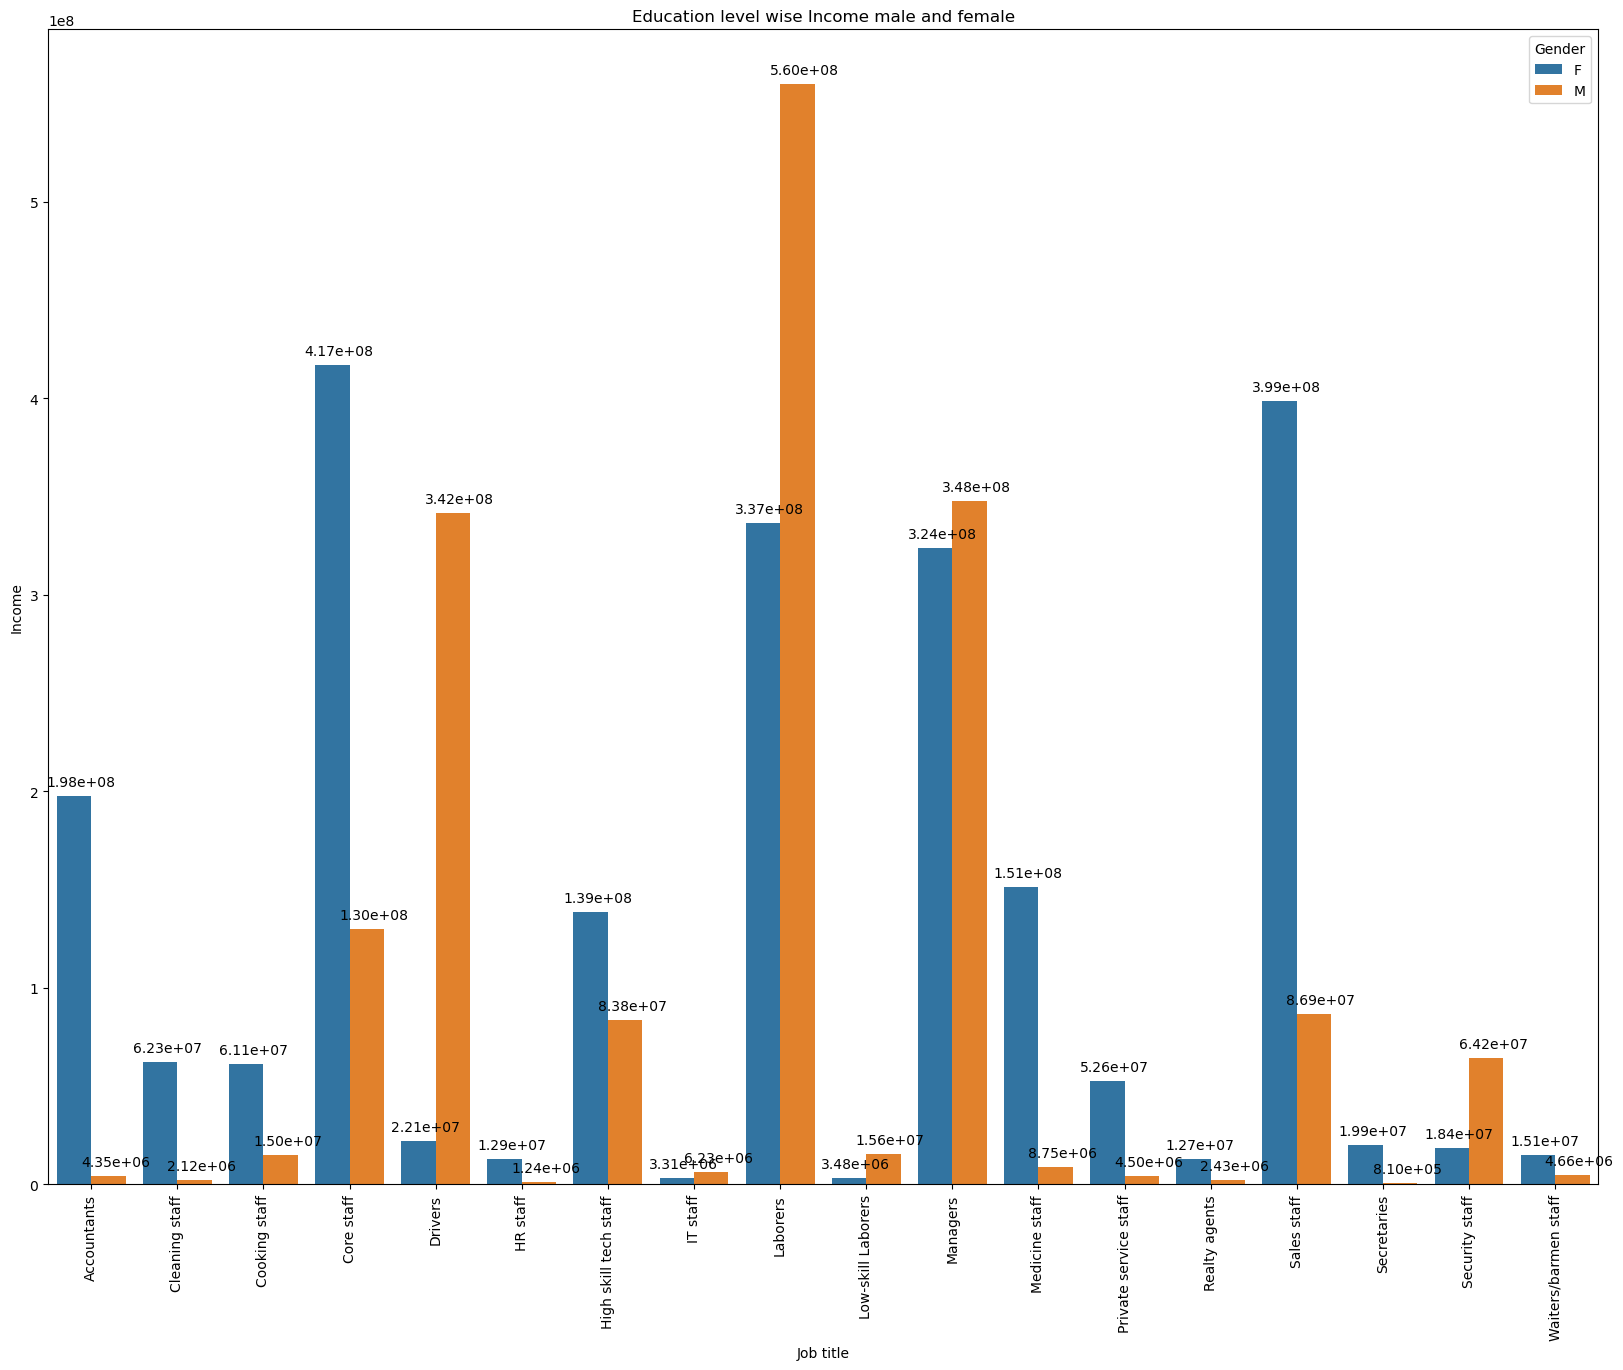

In [131]:
plt.figure(figsize=(20,15))
sns.barplot(data = j,x= 'Job title',y = 'Income',hue = 'Gender')
plt.xticks(rotation = 90)
plt.title('Education level wise Income male and female')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(5, 10), textcoords='offset points')


Based on the job titles, it appears that males have higher education levels and incomes compared to females.

Most males earn their income from labor jobs, while most females earn their income from core staff jobs.

On the other hand, fewer males earn their income from IT jobs, while fewer females earn their income from HR jobs.









# 

# 

In [132]:
i = df.groupby('Is high risk')['Income'].mean()
i = pd.DataFrame(i)
i.reset_index(inplace=True)

Text(0.5, 0, '0 Means No risk 1 mean Risk')

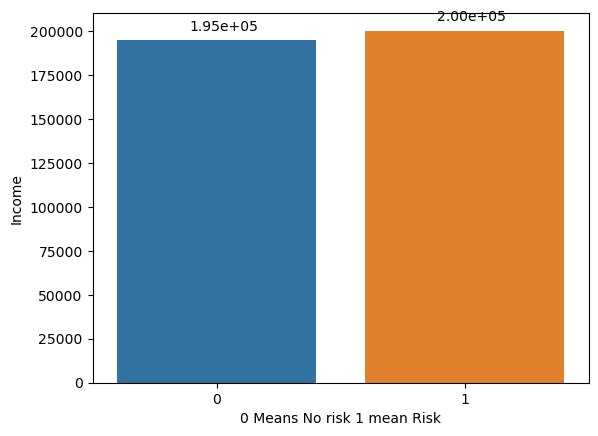

In [133]:
sns.barplot(data = i,x = 'Is high risk', y = 'Income')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2e}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(5, 10), textcoords='offset points'
                )
plt.xlabel('0 Means No risk 1 mean Risk')

In this chart, we show the mean income values based on the risk level. We approve credit cards for individuals with an income of around 1.9 lakh, and for those with an income of 2+ lakh, the credit card is approved based on the risk.



### Let's apply machine learning algorithms.

- first give lable to all column

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
df.dtypes

Gender                  object
Has a car               object
Has a property          object
Children count           int64
Income                 float64
Employment status       object
Education level         object
Marital status          object
Dwelling                object
Has a mobile phone       int64
Has a work phone         int64
Has a phone              int64
Has an email             int64
Job title               object
Family member count      int64
Is high risk             int64
dtype: object

In [136]:
label_encoder = LabelEncoder()


for column in df.columns:
    
    if df[column].dtype == 'object':
        
        df[column] = label_encoder.fit_transform(df[column])



In [137]:
df

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,1,1,1,0,135000.0,4,4,1,5,1,0,0,0,3,2,0
1,0,1,0,1,135000.0,0,1,3,1,1,0,0,0,0,2,0
2,0,0,1,2,180000.0,0,4,1,1,1,0,0,0,8,4,0
3,0,1,1,0,360000.0,0,1,3,1,1,0,0,1,10,1,0
5,0,1,1,0,135000.0,4,4,1,1,1,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29156,1,0,0,0,135000.0,4,4,2,1,1,0,0,0,8,1,0
29158,0,1,0,1,135000.0,4,1,1,2,1,0,0,0,10,3,0
29159,0,0,1,0,135000.0,0,4,1,1,1,0,1,0,2,2,0
29161,0,0,1,1,135000.0,0,4,1,1,1,0,0,0,3,3,0


In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
x= df.iloc[:,:-1]
y = df[['Is high risk']]

In [153]:
lr = LogisticRegression()

In [154]:
model = lr.fit(x,y)

/Users/prerakpandya/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Test Data

In [187]:
df2

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [188]:
df2.drop([ 'Age', 'Employment length', 'Account age'],axis=1,inplace=True)

In [189]:
df2.dropna(inplace=True)

In [190]:
df2

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Medicine staff,1.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,2.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,1,0,0,1,Core staff,2.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,1,0,0,0,Laborers,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7282,5105673,F,N,N,1,135000.0,Working,Higher education,Married,With parents,1,0,0,0,Secretaries,3.0,0
7283,5065795,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Drivers,1.0,0
7285,5088665,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,0,Core staff,1.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,1,0,0,1,Drivers,2.0,0


In [191]:
df2['Family member count'] = df['Family member count'].astype(int)

In [192]:
df2.drop('ID',axis=True,inplace=True)

In [193]:
df2.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,1,0,0,0,Medicine staff,2,0
1,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,2,0
2,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,1,0,0,1,Core staff,4,0
3,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,1,0
4,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,1,0,0,0,Laborers,1,0


In [194]:
df2.shape

(4996, 16)

In [212]:
x2 = df2.iloc[:,:-1]
y2 = df2[['Is high risk']]

In [213]:
label_encoder = LabelEncoder()


for column in x2.columns:
    
    if x2[column].dtype == 'object':
        
        x2[column] = label_encoder.fit_transform(x2[column])


In [224]:
predict = model.predict(x2)

In [225]:
accuracy_score(y2,predict)

0.9969975980784628

### Here we see  the accurancy_score is 0.98 Percentage 

In [226]:
confusion_matrix(y2,predict)

array([[4918,    0],
       [  15,   63]])

here confusuion matrix_score

# 

## Desicion Tree

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [231]:
d = DecisionTreeClassifier()

In [232]:
model1 = d.fit(x,y)

In [234]:
prediction = model1.predict(x2)

In [235]:
accuracy_score(y2,prediction)

0.9969975980784628

In [236]:
#accurancy of decision tress is 0.99 is great 

### Randome Forest 

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [239]:
r = RandomForestClassifier()

In [240]:
model3 = r.fit(x,y)

/var/folders/sp/0mv5k22n18387hf9c9rkd6240000gn/T/ipykernel_64373/2546022835.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3 = r.fit(x,y)


In [241]:
pre = model3.predict(x2)

In [242]:
accuracy_score(y2,pre)

0.9969975980784628

In [244]:
from sklearn.ensemble import AdaBoostClassifier

In [245]:
b = AdaBoostClassifier()

In [246]:
model4 = b.fit(x,y)

/Users/prerakpandya/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
boosting_pre = model4.predict(x2)

In [248]:
accuracy_score(y2,boosting_pre)

0.9843875100080064

# 

# 

### We have utilized various classification algorithms and found that they yield almost identical results in terms of accuracy score